# AIR PASSENGERS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline

In [2]:
airPassengers = pd.read_csv("AirPassengers.csv", parse_dates = [0], index_col = 0)
airPassengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
#Understanding the data
#The total number of air passengers within this time range is shown below
airPassengers['1949-04-03':'1949-05-10']

,#Passengers
Month,
1949-05-01,121


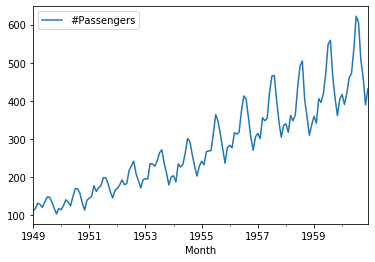

In [4]:
#Graphical representation of passengers in an aircraft
airPassengers.plot()
plt.show()

In [5]:
passengers_1955 = airPassengers['1955']
passengers_1955

,#Passengers
Month,
1955-01-01,242
1955-02-01,233
1955-03-01,267
1955-04-01,269
1955-05-01,270
1955-06-01,315
1955-07-01,364
1955-08-01,347
1955-09-01,312


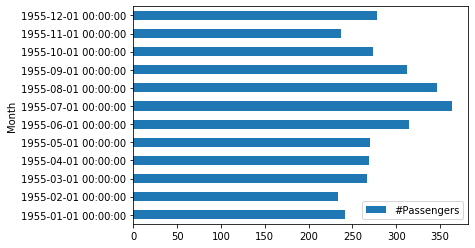

In [6]:
passengers_1955.plot(kind = 'barh')
plt.show()

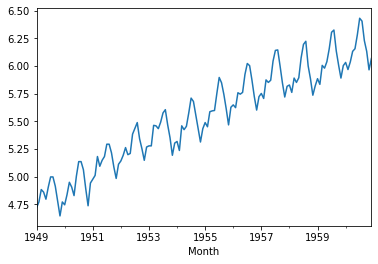

In [7]:
# One method to get rid of time varying variance is to do a power or log transformation 
#that punishes larger values more than smaller values
log_pass = airPassengers['#Passengers'].apply(lambda x: np.log(x))
log_pass.plot()

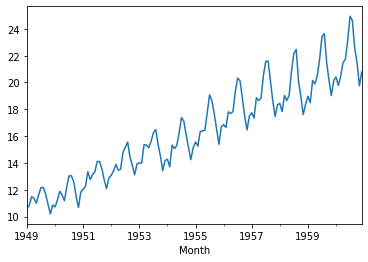

In [8]:
#using a power transformation
pt_pass = airPassengers['#Passengers'].apply(lambda x: x**0.5)
pt_pass.plot()
# This reduces the variance in variance as opposed to the original trend

## Experiment with window size
#### Calculating rolling mean, median and variance

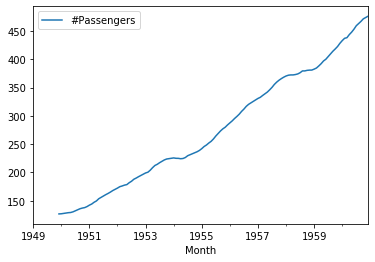

In [9]:
airPassengers.rolling(window = 12).mean().plot()
plt.show()

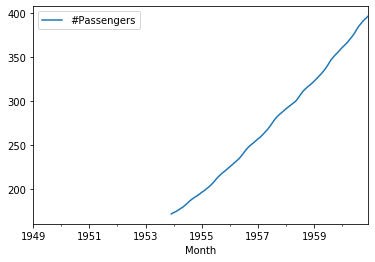

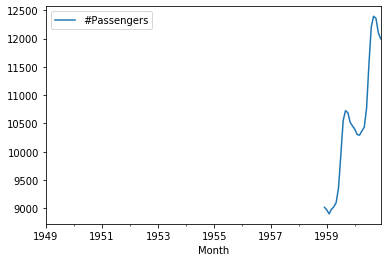

In [10]:
airPassengers.rolling(window = 60).mean().plot()
airPassengers.rolling(window = 120).var().plot()
plt.show()

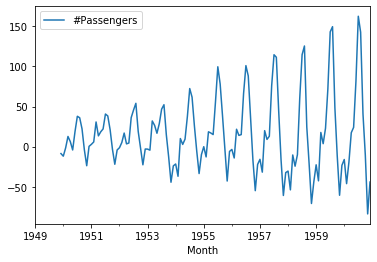

In [11]:
# By subtracting the rolling mean from the original series?
air_mean = airPassengers.rolling(window = 12).mean()
pass_diff = airPassengers - air_mean
pass_diff.plot()
plt.show()

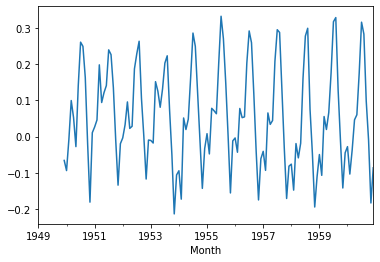

In [12]:
#By detrending after taking the log.
log_air_mean = log_pass.rolling(window = 12).mean()
log_det = log_pass - log_air_mean
log_det.plot()
plt.show()

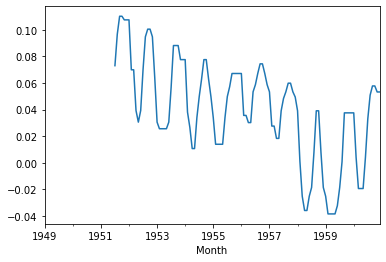

In [13]:
# plotting the median after detrendimg
log_det.rolling(20).median().plot()
plt.show()

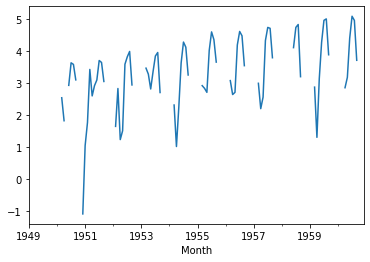

In [14]:
# By detrending before taking the log. How does that look?
#air_mean = airPassengers.rolling(window = 12).mean()
#pass_diff = airPassengers - air_mean
log_det1 = pass_diff['#Passengers'].apply(lambda x: np.log(x))
log_det1.plot()
plt.show()

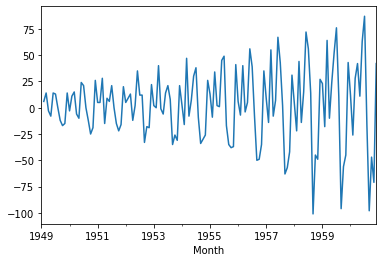

In [15]:
# By differencing, 
air_diff = airPassengers['#Passengers'] - airPassengers['#Passengers'].shift()
air_diff.plot()
plt.show()

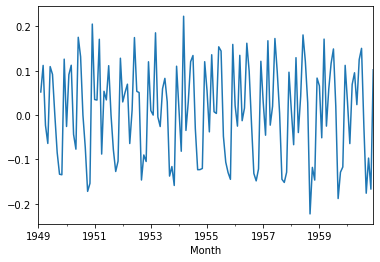

In [16]:
# By differencing,
log_pass_diff = log_pass - log_pass.shift()
log_pass_diff.plot()
plt.show()